In [1]:
import numpy as np
import qutip as qu
from numba import jit
from aux import *

In [2]:
seed = 2
dimensions = np.arange(2, 20)
rng = np.random.default_rng(seed)
repetitions = 1000
rhos = [[qu.rand_dm(d)[:] for _ in range(repetitions)]for d in dimensions]

In [4]:
mse_array = [
    np.mean(
        [
            compute_eig_newton_identities(
                i, rhos_given_dimension[sample_i], scale=1e8
            )
            for sample_i in range(repetitions)
        ]
    )
    for i, rhos_given_dimension in zip(dimensions, rhos)
]


WARNING, dimension 10
WARNING, dimension 10
WARNING, dimension 10
WARNING, dimension 10
WARNING, dimension 10
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, dimension 11
WARNING, d

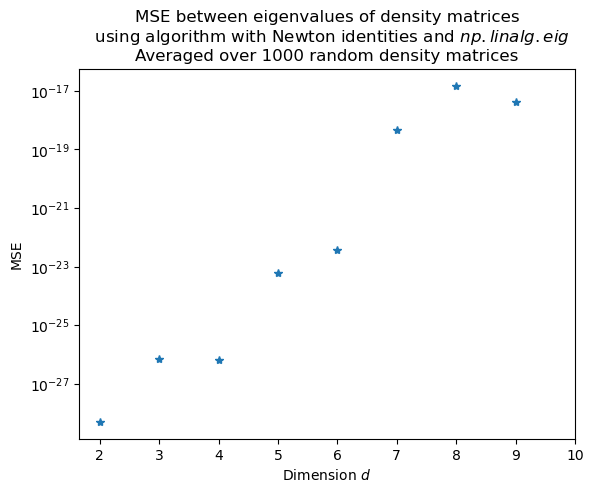

In [8]:
import matplotlib.pyplot as plt

plt.plot(dimensions[0:9], mse_array[0:9], '*')
plt.yscale('log')
plt.xlabel(r"Dimension $d$")
plt.ylabel("MSE")
plt.xticks(dimensions[0:9])
plt.title(r'MSE between eigenvalues of density matrices' + "\n" + r'  using algorithm with Newton identities and $np.linalg.eig$ ' + f"\nAveraged over {repetitions} random density matrices")
# plt.plot(dimensions, objective(dimensions, coefs[0], coefs[1]), '-')
plt.show()